In [1]:
import random
from __future__ import absolute_import, division, print_function
import numpy as np 
import pandas as pd 
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split

In [64]:
from zipfile import ZipFile

with ZipFile('/content/drive/My Drive/Dataset/diabetic rethinopathy/trainLabels19.zip', 'r') as zipObj:
  zipObj.extractall()

In [65]:
annotation = pd.read_csv('/content/drive/My Drive/Dataset/diabetic rethinopathy/trainlabels/trainLabels19.csv')

In [66]:
def one_hot_label(label):
  if label==0 :
    return [1,0,0,0,0]
  elif label == 1 :
    return [0,1,0,0,0]
  elif label== 2 : 
    return [0,0,1,0,0]
  elif label == 3 :
    return [0,0,0,1,0]
  else :
    return [0,0,0,0,1]

def data(annotation):
  images = []
  labels = []
  for index , data in annotation.iterrows():
    image = cv2.imread("/content/trainLabels19/"+data['id_code']+".jpg")
    image = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
    images.append(image)
    labels.append(one_hot_label(int(data['diagnosis'])))
  return np.array(images) , np.array(labels)


x , y = load_train(training_annotation)

In [67]:
train_x , test_x , train_y , test_y = train_test_split(x ,y , test_size=0.25) 

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[1 0 0 0 0]')

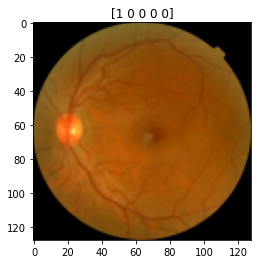

In [68]:
index = 12
b, g, r = cv2.split(train_x[index])
image_for_analysis = cv2.merge((r, g, b))
plt.imshow(image_for_analysis)
plt.title(train_y[index])

In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen_train = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen_train.fit(train_x)

datagen_test = ImageDataGenerator(
    rescale=1./255)
datagen_test.fit(test_x)

In [71]:
from keras import backend as K 

K.clear_session()
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
def create_model(my_learning_rate):

  
  base_model = tf.keras.applications.vgg19.VGG19(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
  base_model.trainable = False

  x = base_model.output
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dense(1024, activation='relu')(x)
  x = layers.Dense(128, activation='relu')(x)
  x = layers.Dense(5, activation='softmax')(x)
  
  model = models.Model(inputs=base_model.input, outputs=x)
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
              loss="categorical_crossentropy",
              metrics=['accuracy'])
  return model  

In [72]:
epochs = 25
learning_rate = 0.00002

model = create_model(learning_rate)
model.fit(datagen_train.flow(train_x, train_y, batch_size=32),
                  steps_per_epoch=len(train_x) / 32, epochs=epochs,
                  validation_data = datagen_test.flow(test_x,test_y))
 

Epoch 1/25
86/85 [==============================] - 11s 122ms/step - loss: 1.3172 - accuracy: 0.4563 - val_loss: 1.2043 - val_accuracy: 0.5033
Epoch 2/25
86/85 [==============================] - 10s 121ms/step - loss: 1.1299 - accuracy: 0.5663 - val_loss: 1.1348 - val_accuracy: 0.5011
Epoch 3/25
86/85 [==============================] - 10s 118ms/step - loss: 1.0593 - accuracy: 0.6366 - val_loss: 1.1065 - val_accuracy: 0.5218
Epoch 4/25
86/85 [==============================] - 10s 117ms/step - loss: 1.0104 - accuracy: 0.6529 - val_loss: 1.0528 - val_accuracy: 0.5535
Epoch 5/25
86/85 [==============================] - 10s 118ms/step - loss: 0.9715 - accuracy: 0.6697 - val_loss: 1.0169 - val_accuracy: 0.5917
Epoch 6/25
86/85 [==============================] - 10s 118ms/step - loss: 0.9440 - accuracy: 0.6726 - val_loss: 1.0203 - val_accuracy: 0.5852
Epoch 7/25
86/85 [==============================] - 10s 121ms/step - loss: 0.9240 - accuracy: 0.6781 - val_loss: 0.9751 - val_accuracy: 0.6245

In [73]:
! pip install -q pyyaml h5py
model.save('/content/drive/My Drive/Model/diabetic rethinopaty/model_version_1.h5') 